In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/application_train.csv')

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train.columns = map(str.lower, train.columns)

In [5]:
test = pd.read_csv('data/application_test.csv')
test.columns = map(str.lower, test.columns)

### Basic info

In [6]:
train.shape

(307511, 122)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, sk_id_curr to amt_req_credit_bureau_year
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
train.describe()

,sk_id_curr,target,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,region_population_relative,days_birth,days_employed,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
correlation_matrix = train.corr()

In [10]:
correlation_df = pd.DataFrame(correlation_matrix['target'].sort_values(ascending=False)).reset_index()
correlation_df.columns = ['column', 'correlation']
correlation_df.head(20)
correlation_df

,column,correlation
0,target,1.000000
1,days_birth,0.078239
2,region_rating_client_w_city,0.060893
3,region_rating_client,0.058899
4,days_last_phone_change,0.055218
...,...,...
101,floorsmax_avg,-0.044003
102,days_employed,-0.044932
103,ext_source_1,-0.155317
104,ext_source_2,-0.160472


In [11]:
correlation_df.loc[correlation_df['column']=='flag_work_phone']  #.loc[correlation_df['column']=='name_type_suite']

,column,correlation
15,flag_work_phone,0.028524


In [12]:
correlation_df.tail(20)

,column,correlation
86,amt_credit,-0.030369
87,livingarea_mode,-0.030685
88,elevators_mode,-0.032131
89,totalarea_mode,-0.032596
90,floorsmin_mode,-0.032698
91,livingarea_medi,-0.032739
92,livingarea_avg,-0.032997
93,floorsmin_medi,-0.033394
94,floorsmin_avg,-0.033614
95,elevators_medi,-0.033863


## Exploring which columns have nulls

In [13]:
# sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [14]:
columns = train.columns
null_counts = []
null_percentages = []
for column in columns:
    nulls = train[column].isnull().sum()
    null_counts.append(nulls)
    null_percentages.append( (nulls / len(train) ) * 100 )
zipped_nulls = list(zip(columns,null_counts,null_percentages))

In [15]:
nulls_df = pd.DataFrame(zipped_nulls, columns=['Column', 'Null_Count', 'Null_Percentage']).sort_values('Null_Percentage', ascending=False)

In [16]:
nulls_df = nulls_df.loc[nulls_df['Null_Percentage'] != 0]
nulls_df

,Column,Null_Count,Null_Percentage
76,commonarea_medi,214865,69.872297
48,commonarea_avg,214865,69.872297
62,commonarea_mode,214865,69.872297
70,nonlivingapartments_mode,213514,69.432963
56,nonlivingapartments_avg,213514,69.432963
...,...,...,...
42,ext_source_2,660,0.214626
10,amt_goods_price,278,0.090403
9,amt_annuity,12,0.003902
29,cnt_fam_members,2,0.000650


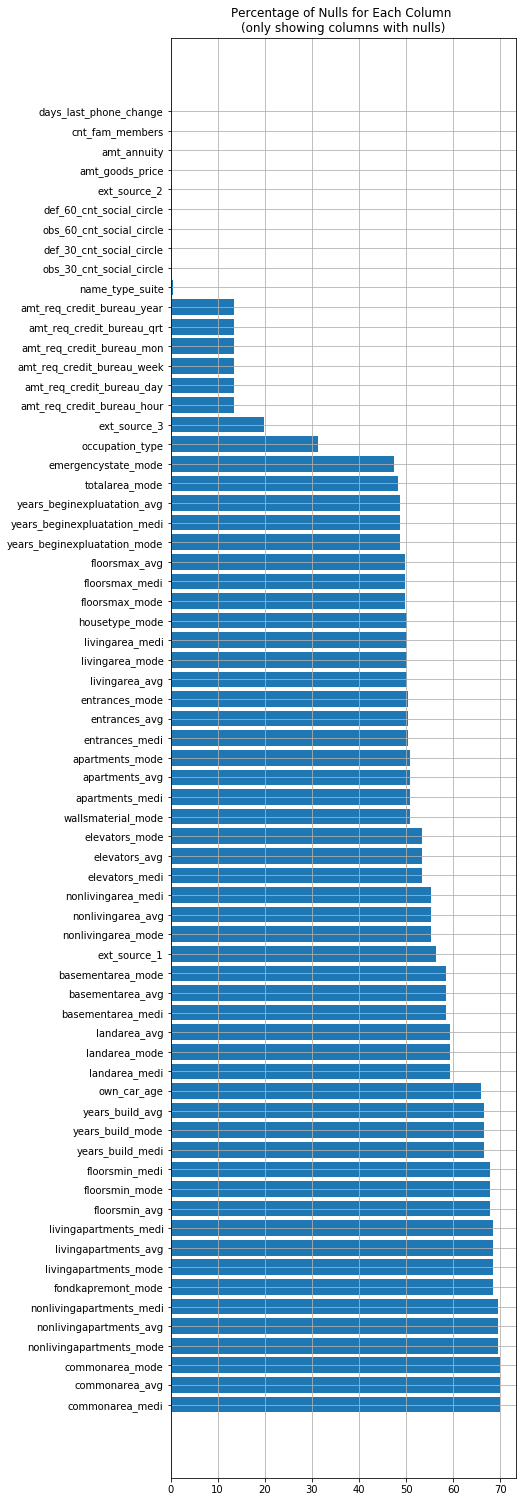

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, .8, 5])
axes.barh(nulls_df['Column'], nulls_df['Null_Percentage'])
axes.set_title('Percentage of Nulls for Each Column \n(only showing columns with nulls)')
axes.grid()

## Exploring the data types

In [18]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### How many categories?

In [19]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

name_contract_type             2
code_gender                    3
flag_own_car                   2
flag_own_realty                2
name_type_suite                7
name_income_type               8
name_education_type            5
name_family_status             6
name_housing_type              6
occupation_type               18
weekday_appr_process_start     7
organization_type             58
fondkapremont_mode             4
housetype_mode                 3
wallsmaterial_mode             7
emergencystate_mode            2
dtype: int64

### Do any of the categorical columns have nulls?

In [20]:
columnss = []
for column in train.columns:
    if train[column].dtype == 'object':
        if train[column].isnull().values.any():
            columnss.append(column)
            print(f'column: {column}')
            print(train[column].isnull().sum())
            print(nulls_df.loc[nulls_df['Column']==column])
            print()
            print()

column: name_type_suite
1292
             Column  Null_Count  Null_Percentage
11  name_type_suite        1292         0.420148


column: occupation_type
96391
             Column  Null_Count  Null_Percentage
28  occupation_type       96391        31.345545


column: fondkapremont_mode
210295
                Column  Null_Count  Null_Percentage
86  fondkapremont_mode      210295        68.386172


column: housetype_mode
154297
            Column  Null_Count  Null_Percentage
87  housetype_mode      154297        50.176091


column: wallsmaterial_mode
156341
                Column  Null_Count  Null_Percentage
89  wallsmaterial_mode      156341        50.840783


column: emergencystate_mode
145755
                 Column  Null_Count  Null_Percentage
90  emergencystate_mode      145755        47.398304




## Exploring the relationships

#### Misc plots...

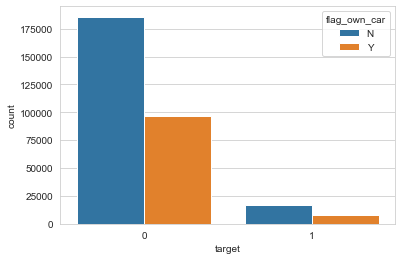

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='target', hue='flag_own_car', data=train)

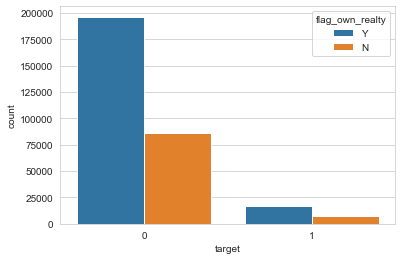

In [23]:
sns.countplot(x='target', hue='flag_own_realty', data=train)

In [24]:
correlation_df.tail(20)

,column,correlation
86,amt_credit,-0.030369
87,livingarea_mode,-0.030685
88,elevators_mode,-0.032131
89,totalarea_mode,-0.032596
90,floorsmin_mode,-0.032698
91,livingarea_medi,-0.032739
92,livingarea_avg,-0.032997
93,floorsmin_medi,-0.033394
94,floorsmin_avg,-0.033614
95,elevators_medi,-0.033863


## Prepping the data for the ML model

In [25]:
for item in list(train['code_gender'].unique()):
    print(item)

M
F
XNA


### This will find out which categorical variables that exist in one dataset but not the other

In [26]:
for column in list(train.columns):
    if train[column].dtype == 'object':
        train_list = list(train[column].unique())
        test_list = list(test[column].unique())
        if len(train_list) > len(test_list):
            print(f"Extra items in [{column}] column in train data:")
            print(list(set(train_list) - set(test_list)))
#         elif len(test_list) > len(train_list):
#             print(f"Extra items in {column} column in test data:")
#             print(list(set(test_list) - set(train_list)))

Extra items in [code_gender] column in train data:
['XNA']
Extra items in [name_income_type] column in train data:
['Maternity leave']
Extra items in [name_family_status] column in train data:
['Unknown']


#### As shown below, XNA, Maternity leave, and Unknown only appear 4, 5, 2 times, so we can just drop them.

In [27]:
train['code_gender'].value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

In [28]:
train['name_income_type'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: name_income_type, dtype: int64

In [29]:
train['name_family_status'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: name_family_status, dtype: int64

In [30]:
grouped_train = train.copy()

## Checking out the distribution of defaults by age

In [31]:
grouped_train['age'] = grouped_train['days_birth']/-365

In [51]:
age_bins = pd.cut(grouped_train['age'], list(np.arange(15,80,5)))

In [69]:
binned_age_target = grouped_train.groupby([age_bins, 'target']).agg({'target': 'sum'}) 

age_target = grouped_train.groupby(age_bins).agg({'target': 'count'})

binned_age_target.div(age_target, level='age') *100

target
age      target           
(15, 20] 0             NaN
         1             NaN
(20, 25] 0        0.000000
         1       12.303643
(25, 30] 0        0.000000
         1       11.143570
(30, 35] 0        0.000000
         1       10.281440
(35, 40] 0        0.000000
         1        8.941402
(40, 45] 0        0.000000
         1        7.849104
(45, 50] 0        0.000000
         1        7.417105
(50, 55] 0        0.000000
         1        6.696812
(55, 60] 0        0.000000
         1        5.531401
(60, 65] 0        0.000000
         1        5.273693
(65, 70] 0        0.000000
         1        3.727015
(70, 75] 0             NaN
         1             NaN

In [113]:
counts = (grouped_train.groupby(age_bins).agg({'target': 'count'})).reset_index()
sums = (grouped_train.groupby(age_bins).agg({'target': 'sum'}))

merged_age_bins = pd.merge(sums, counts, on='age')
merged_age_bins['percentage'] = round(merged_age_bins['target_x']/merged_age_bins['target_y'] * 100, 4)

defaults_by_age = merged_age_bins[['age', 'percentage']]
defaults_by_age.dropna(inplace=True)
defaults_by_age

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,age,percentage
1,"(20, 25]",12.3036
2,"(25, 30]",11.1436
3,"(30, 35]",10.2814
4,"(35, 40]",8.9414
5,"(40, 45]",7.8491
6,"(45, 50]",7.4171
7,"(50, 55]",6.6968
8,"(55, 60]",5.5314
9,"(60, 65]",5.2737
10,"(65, 70]",3.7270


(array([12.3036, 11.1436, 10.2814,  8.9414,  7.8491,  7.4171,  6.6968,
         5.5314,  5.2737,  3.727 ]),
 array([25. , 29.5, 34. , 38.5, 43. , 47.5, 52. , 56.5, 61. , 65.5, 70. ]),
 <a list of 10 Patch objects>)

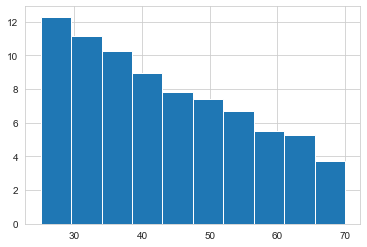

In [131]:
plt.hist(list(np.arange(25,71,5)), 10, weights=default_proportions_by_age)

In [127]:
np.arange(25,7,5)

array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

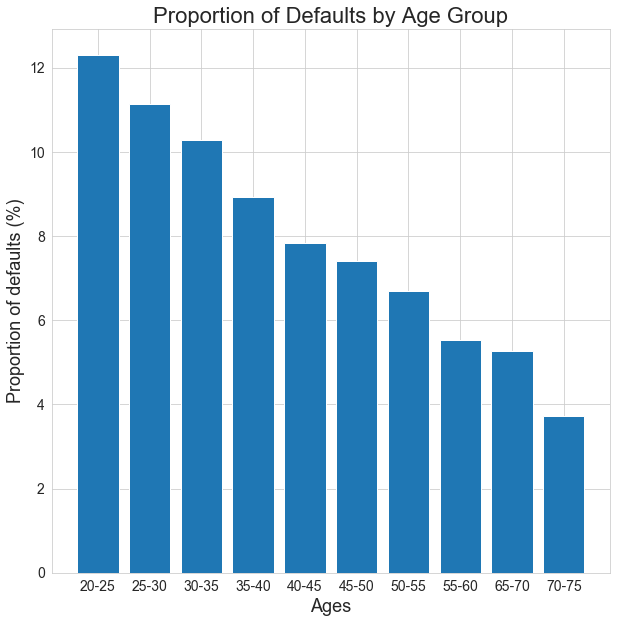

In [181]:
age_label = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '65-70', '70-75']
age_fig = plt.figure(figsize=(10,10))
age_ax = plt.axes()
age_ax.bar(list(np.arange(0,10,1)),height=default_proportions_by_age, tick_label=age_label)

age_ax.tick_params(labelsize=14)

age_ax.set_xlabel('Ages', fontsize=18)
age_ax.set_ylabel('Proportion of defaults (%)', fontsize=18)
age_ax.set_title('Proportion of Defaults by Age Group', fontsize=22)
# age_fig.savefig('defaults_by_age.png', dpi=400)